In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [22]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [23]:
dfSigJpsiVsPtCentr1050 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_pt_10_50_rebin.txt', sep=' ')
ptMin = dfSigJpsiVsPtCentr1050["x_min"]
ptMax = dfSigJpsiVsPtCentr1050["x_max"]
pt = (ptMin + ptMax) / 2.
errPt = (ptMax - ptMin) / 2.

sigJpsiVsPtCentr1050 = dfSigJpsiVsPtCentr1050["val"] / (2 * errPt)
statSigJpsiVsPtCentr1050 = dfSigJpsiVsPtCentr1050["stat"] / (2 * errPt)
systSigJpsiVsPtCentr1050 = dfSigJpsiVsPtCentr1050["syst"] / (2 * errPt)

dfSigJpsiVsPtCentr1030 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_pt_10_30.txt', sep=' ')
sigJpsiVsPtCentr1030 = dfSigJpsiVsPtCentr1030["val"] / (2 * errPt)
statSigJpsiVsPtCentr1030 = dfSigJpsiVsPtCentr1030["stat"] / (2 * errPt)
systSigJpsiVsPtCentr1030 = dfSigJpsiVsPtCentr1030["syst"] / (2 * errPt)

dfSigJpsiVsPtCentr3050 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_pt_30_50.txt', sep=' ')
sigJpsiVsPtCentr3050 = dfSigJpsiVsPtCentr3050["val"] / (2 * errPt)
statSigJpsiVsPtCentr3050 = dfSigJpsiVsPtCentr3050["stat"] / (2 * errPt)
systSigJpsiVsPtCentr3050 = dfSigJpsiVsPtCentr3050["syst"] / (2 * errPt)


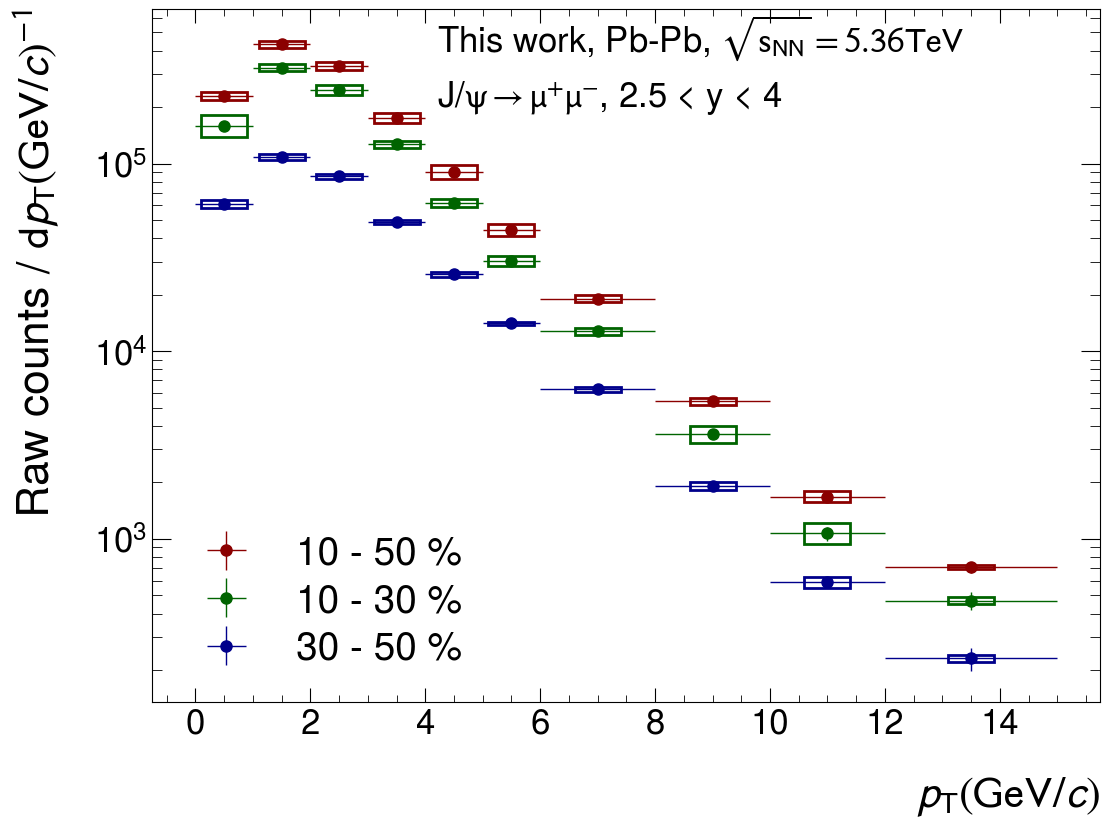

In [24]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt, 0.4, sigJpsiVsPtCentr1050, systSigJpsiVsPtCentr1050, ax, 'darkred', 2)
plot_syst(pt, 0.4, sigJpsiVsPtCentr1030, systSigJpsiVsPtCentr1030, ax, 'darkgreen', 2)
plot_syst(pt, 0.4, sigJpsiVsPtCentr3050, systSigJpsiVsPtCentr3050, ax, 'darkblue', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'Raw counts / $\rm{d}\it{p}_{\rm{T}} (\rm{GeV}/\it{c})^{-1}$') 
plt.yscale('log')
plt.errorbar(pt, sigJpsiVsPtCentr1050, xerr=errPt, yerr=statSigJpsiVsPtCentr1050, label="10 - 50 %", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(pt, sigJpsiVsPtCentr1030, xerr=errPt, yerr=statSigJpsiVsPtCentr1030, label="10 - 30 %", fmt='o', color='darkgreen', ecolor='darkgreen')
plt.errorbar(pt, sigJpsiVsPtCentr3050, xerr=errPt, yerr=statSigJpsiVsPtCentr3050, label="30 - 50 %", fmt='o', color='darkblue', ecolor='darkblue')
plt.legend(loc='lower left')
plt.text(4.2, 4e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(4.2, 2e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
#plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_pt_centr_10_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [25]:
print("--- J/psi signal extraction vs pt in 10-50% ---")
for id, val in enumerate(sigJpsiVsPtCentr1050):
    sig = val
    stat = statSigJpsiVsPtCentr1050[id]
    syst = systSigJpsiVsPtCentr1050[id]
    relStat = (stat / sig) * 100
    relSyst = (syst / sig) * 100
    print(f'{ptMin[id]} - {ptMax[id]} & {sig:.0f} $\pm$ {stat:.0f} ({relStat:.1f}\%) $\pm$ {syst:.0f} ({relSyst:.1f}\%) \\')

--- J/psi signal extraction vs pt in 10-50% ---
0.0 - 1.0 & 229578 $\pm$ 3009 (1.3\%) $\pm$ 12097 (5.3\%) \
1.0 - 2.0 & 431296 $\pm$ 3369 (0.8\%) $\pm$ 20773 (4.8\%) \
2.0 - 3.0 & 329649 $\pm$ 2169 (0.7\%) $\pm$ 16277 (4.9\%) \
3.0 - 4.0 & 175723 $\pm$ 1681 (1.0\%) $\pm$ 10775 (6.1\%) \
4.0 - 5.0 & 90512 $\pm$ 1384 (1.5\%) $\pm$ 7533 (8.3\%) \
5.0 - 6.0 & 44224 $\pm$ 924 (2.1\%) $\pm$ 3349 (7.6\%) \
6.0 - 8.0 & 19024 $\pm$ 357 (1.9\%) $\pm$ 835 (4.4\%) \
8.0 - 10.0 & 5402 $\pm$ 165 (3.1\%) $\pm$ 252 (4.7\%) \
10.0 - 12.0 & 1681 $\pm$ 117 (6.9\%) $\pm$ 110 (6.5\%) \
12.0 - 15.0 & 706 $\pm$ 50 (7.1\%) $\pm$ 16 (2.3\%) \


In [26]:
print("--- J/psi signal extraction vs pt in 10-30% ---")
for id, val in enumerate(sigJpsiVsPtCentr1030):
    sig = val
    stat = statSigJpsiVsPtCentr1030[id]
    syst = systSigJpsiVsPtCentr1030[id]
    relStat = (stat / sig) * 100
    relSyst = (syst / sig) * 100
    print(f'{ptMin[id]} - {ptMax[id]} & {sig:.0f} $\pm$ {stat:.0f} ({relStat:.1f}\%) $\pm$ {syst:.0f} ({relSyst:.1f}\%) \\')

--- J/psi signal extraction vs pt in 10-30% ---
0.0 - 1.0 & 159367 $\pm$ 2505 (1.6\%) $\pm$ 21444 (13.5\%) \
1.0 - 2.0 & 323469 $\pm$ 3311 (1.0\%) $\pm$ 13843 (4.3\%) \
2.0 - 3.0 & 246239 $\pm$ 1934 (0.8\%) $\pm$ 15413 (6.3\%) \
3.0 - 4.0 & 127070 $\pm$ 1703 (1.3\%) $\pm$ 5330 (4.2\%) \
4.0 - 5.0 & 61743 $\pm$ 1244 (2.0\%) $\pm$ 3383 (5.5\%) \
5.0 - 6.0 & 30292 $\pm$ 831 (2.7\%) $\pm$ 1868 (6.2\%) \
6.0 - 8.0 & 12814 $\pm$ 390 (3.0\%) $\pm$ 563 (4.4\%) \
8.0 - 10.0 & 3603 $\pm$ 135 (3.7\%) $\pm$ 370 (10.3\%) \
10.0 - 12.0 & 1072 $\pm$ 92 (8.6\%) $\pm$ 137 (12.8\%) \
12.0 - 15.0 & 469 $\pm$ 53 (11.3\%) $\pm$ 22 (4.6\%) \


In [27]:
print("--- J/psi signal extraction vs pt in 30-50% ---")
for id, val in enumerate(sigJpsiVsPtCentr3050):
    sig = val
    stat = statSigJpsiVsPtCentr3050[id]
    syst = systSigJpsiVsPtCentr3050[id]
    relStat = (stat / sig) * 100
    relSyst = (syst / sig) * 100
    print(f'{ptMin[id]} - {ptMax[id]} & {sig:.0f} $\pm$ {stat:.0f} ({relStat:.1f}\%) $\pm$ {syst:.0f} ({relSyst:.1f}\%) \\')

--- J/psi signal extraction vs pt in 30-50% ---
0.0 - 1.0 & 61008 $\pm$ 1456 (2.4\%) $\pm$ 3209 (5.3\%) \
1.0 - 2.0 & 108801 $\pm$ 1614 (1.5\%) $\pm$ 3917 (3.6\%) \
2.0 - 3.0 & 85578 $\pm$ 958 (1.1\%) $\pm$ 2692 (3.1\%) \
3.0 - 4.0 & 48850 $\pm$ 658 (1.3\%) $\pm$ 1455 (3.0\%) \
4.0 - 5.0 & 25708 $\pm$ 646 (2.5\%) $\pm$ 879 (3.4\%) \
5.0 - 6.0 & 14065 $\pm$ 382 (2.7\%) $\pm$ 309 (2.2\%) \
6.0 - 8.0 & 6282 $\pm$ 187 (3.0\%) $\pm$ 183 (2.9\%) \
8.0 - 10.0 & 1916 $\pm$ 76 (4.0\%) $\pm$ 85 (4.4\%) \
10.0 - 12.0 & 590 $\pm$ 44 (7.4\%) $\pm$ 41 (6.9\%) \
12.0 - 15.0 & 231 $\pm$ 32 (14.0\%) $\pm$ 9 (4.0\%) \
